<a href="https://colab.research.google.com/github/04Ricky/DeepLearning/blob/master/Food_Image_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from scipy.io import *

In [6]:
path = untar_data(URLs.FOOD)

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/classes.txt'),
 PosixPath('/root/.fastai/data/food-101/h5'),
 PosixPath('/root/.fastai/data/food-101/labels.txt'),
 PosixPath('/root/.fastai/data/food-101/train.txt'),
 PosixPath('/root/.fastai/data/food-101/train.json'),
 PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/test.txt'),
 PosixPath('/root/.fastai/data/food-101/images')]

In [8]:
df = pd.read_json(path/'train.json')
df.head()

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,tacos,pad_thai,poutine,ramen,pulled_pork_sandwich,bibimbap,beignets,apple_pie,crab_cakes,risotto,paella,steak,baby_back_ribs,miso_soup,frozen_yogurt,club_sandwich,carrot_cake,falafel,bread_pudding,chicken_wings,gnocchi,caprese_salad,creme_brulee,escargots,chocolate_cake,tiramisu,spaghetti_bolognese,mussels,scallops,baklava,...,fried_rice,donuts,gyoza,ravioli,fried_calamari,spaghetti_carbonara,french_toast,lobster_bisque,ceviche,bruschetta,french_fries,shrimp_and_grits,filet_mignon,hamburger,dumplings,tuna_tartare,sushi,cheese_plate,eggs_benedict,cup_cakes,takoyaki,chocolate_mousse,breakfast_burrito,hot_dog,macarons,waffles,seaweed_salad,cannoli,huevos_rancheros,pizza,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1004234,hot_and_sour_soup/1002782,samosa/1008131,sashimi/1001239,pork_chop/1000802,spring_rolls/1002160,panna_cotta/1001332,beef_tartare/1000431,greek_salad/1007149,foie_gras/1004944,tacos/1002217,pad_thai/1004763,poutine/1005364,ramen/1002305,pulled_pork_sandwich/1004064,bibimbap/1002297,beignets/1000911,apple_pie/1005649,crab_cakes/100038,risotto/1004412,paella/1000388,steak/1000205,baby_back_ribs/1005293,miso_soup/1032814,frozen_yogurt/1000735,club_sandwich/1017761,carrot_cake/1000447,falafel/1003181,bread_pudding/1004499,chicken_wings/1003533,gnocchi/100409,caprese_salad/1001946,creme_brulee/1000711,escargots/1011707,chocolate_cake/1001084,tiramisu/1002946,spaghetti_bolognese/100127,mussels/1015628,scallops/1002727,baklava/1006121,...,fried_rice/1004221,donuts/100076,gyoza/1003912,ravioli/1008464,fried_calamari/100411,spaghetti_carbonara/1005482,french_toast/100223,lobster_bisque/1022294,ceviche/1006106,bruschetta/1003796,french_fries/100148,shrimp_and_grits/1002860,filet_mignon/1001477,hamburger/100057,dumplings/1000786,tuna_tartare/1010528,sushi/100332,cheese_plate/100370,eggs_benedict/1000104,cup_cakes/1005580,takoyaki/1002167,chocolate_mousse/1013482,breakfast_burrito/1000351,hot_dog/1000288,macarons/1001193,waffles/100242,seaweed_salad/1007167,cannoli/1007970,huevos_rancheros/100439,pizza/1008104,chicken_quesadilla/1004279,pho/1005681,prime_rib/1001089,cheesecake/1001446,ice_cream/1012277,omelette/1001719,grilled_cheese_sandwich/1003153,lobster_roll_sandwich/100009,nachos/100284,oysters/1008124
1,churros/1013460,hot_and_sour_soup/1003688,samosa/1011601,sashimi/1001363,pork_chop/1006233,spring_rolls/1003056,panna_cotta/1003460,beef_tartare/1005746,greek_salad/1009138,foie_gras/1008577,tacos/1005454,pad_thai/1009595,poutine/1019904,ramen/1002843,pulled_pork_sandwich/1005662,bibimbap/1006709,beignets/1002569,apple_pie/1014775,crab_cakes/1003375,risotto/1009354,paella/1000412,steak/100135,baby_back_ribs/1007102,miso_soup/1038398,frozen_yogurt/100093,club_sandwich/1020435,carrot_cake/1003032,falafel/1008896,bread_pudding/1004540,chicken_wings/1008504,gnocchi/100680,caprese_salad/1024778,creme_brulee/1004352,escargots/1014257,chocolate_cake/1007122,tiramisu/100504,spaghetti_bolognese/1004943,mussels/102234,scallops/1007089,baklava/1014880,...,fried_rice/1008935,donuts/100576,gyoza/1020354,ravioli/1010610,fried_calamari/10044,spaghetti_carbonara/1007514,french_toast/100344,lobster_bisque/102237,ceviche/1013481,bruschetta/1031947,french_fries/1008945,shrimp_and_grits/1003400,filet_mignon/1002767,hamburger/100517,dumplings/100251,tuna_tartare/1010786,sushi/1005352,cheese_plate/1003804,eggs_benedict/1002786,cup_cakes/1008351,takoyaki/1002237,chocolate_mousse/1018802,breakfast_burrito/1000669,hot_dog/1011661,macarons/1001527,waffles/100353,seaweed_salad/1014295,cannoli/1008331,huevos_rancheros/100486,pizza/1008144,chicken_quesadilla/1009225,pho/1011443,prime_rib/1006320,cheesecake/1004515,ice_cream/101858,omelette/1007843,grilled_cheese_sandwich/10060,lobster_roll_sandwich/1001432,nachos/1009513,oysters/1016229
2,churros/101

In [0]:
path_img=path/'images'
#path_img.ls()



In [10]:
fn_paths = [name for name in df.columns.values]
fn_paths[:5]

['churros', 'hot_and_sour_soup', 'samosa', 'sashimi', 'pork_chop']

In [0]:
tfms = get_transforms(do_flip=False)


data = (ImageList.from_folder(path=path_img).split_by_rand_pct().label_from_folder().transform(tfms, size=224).databunch())



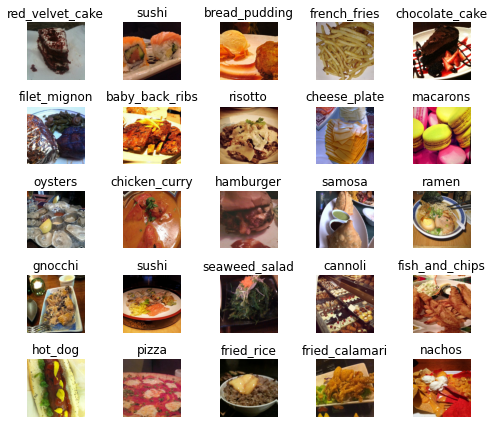

In [13]:
data.show_batch(rows=5, figsize=(7,6))



In [14]:
print(data.classes)
data.c

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

101

In [15]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [135]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.982408,1.526995,0.398168,24:35
1,1.537212,1.209875,0.320693,24:40
2,1.289056,1.053572,0.282129,23:59
3,1.165056,1.017829,0.271386,23:53


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f274bce9b70>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 941, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f274bce9b70>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 961, in __del__
    self._shutdown_workers()
  File "/usr/local/l

In [0]:
learn.save('stage1')

In [138]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

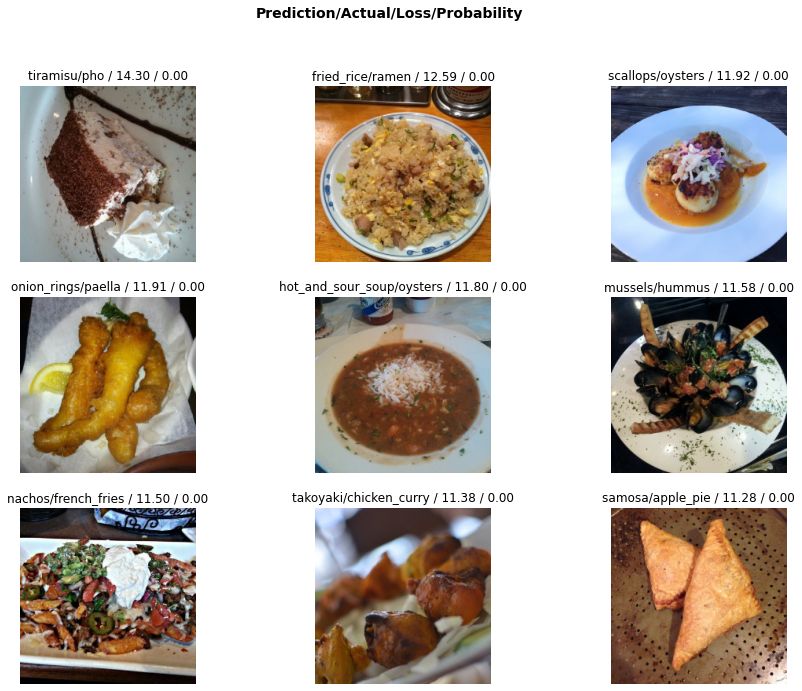

In [139]:
interp.plot_top_losses(9, figsize= (15,11))

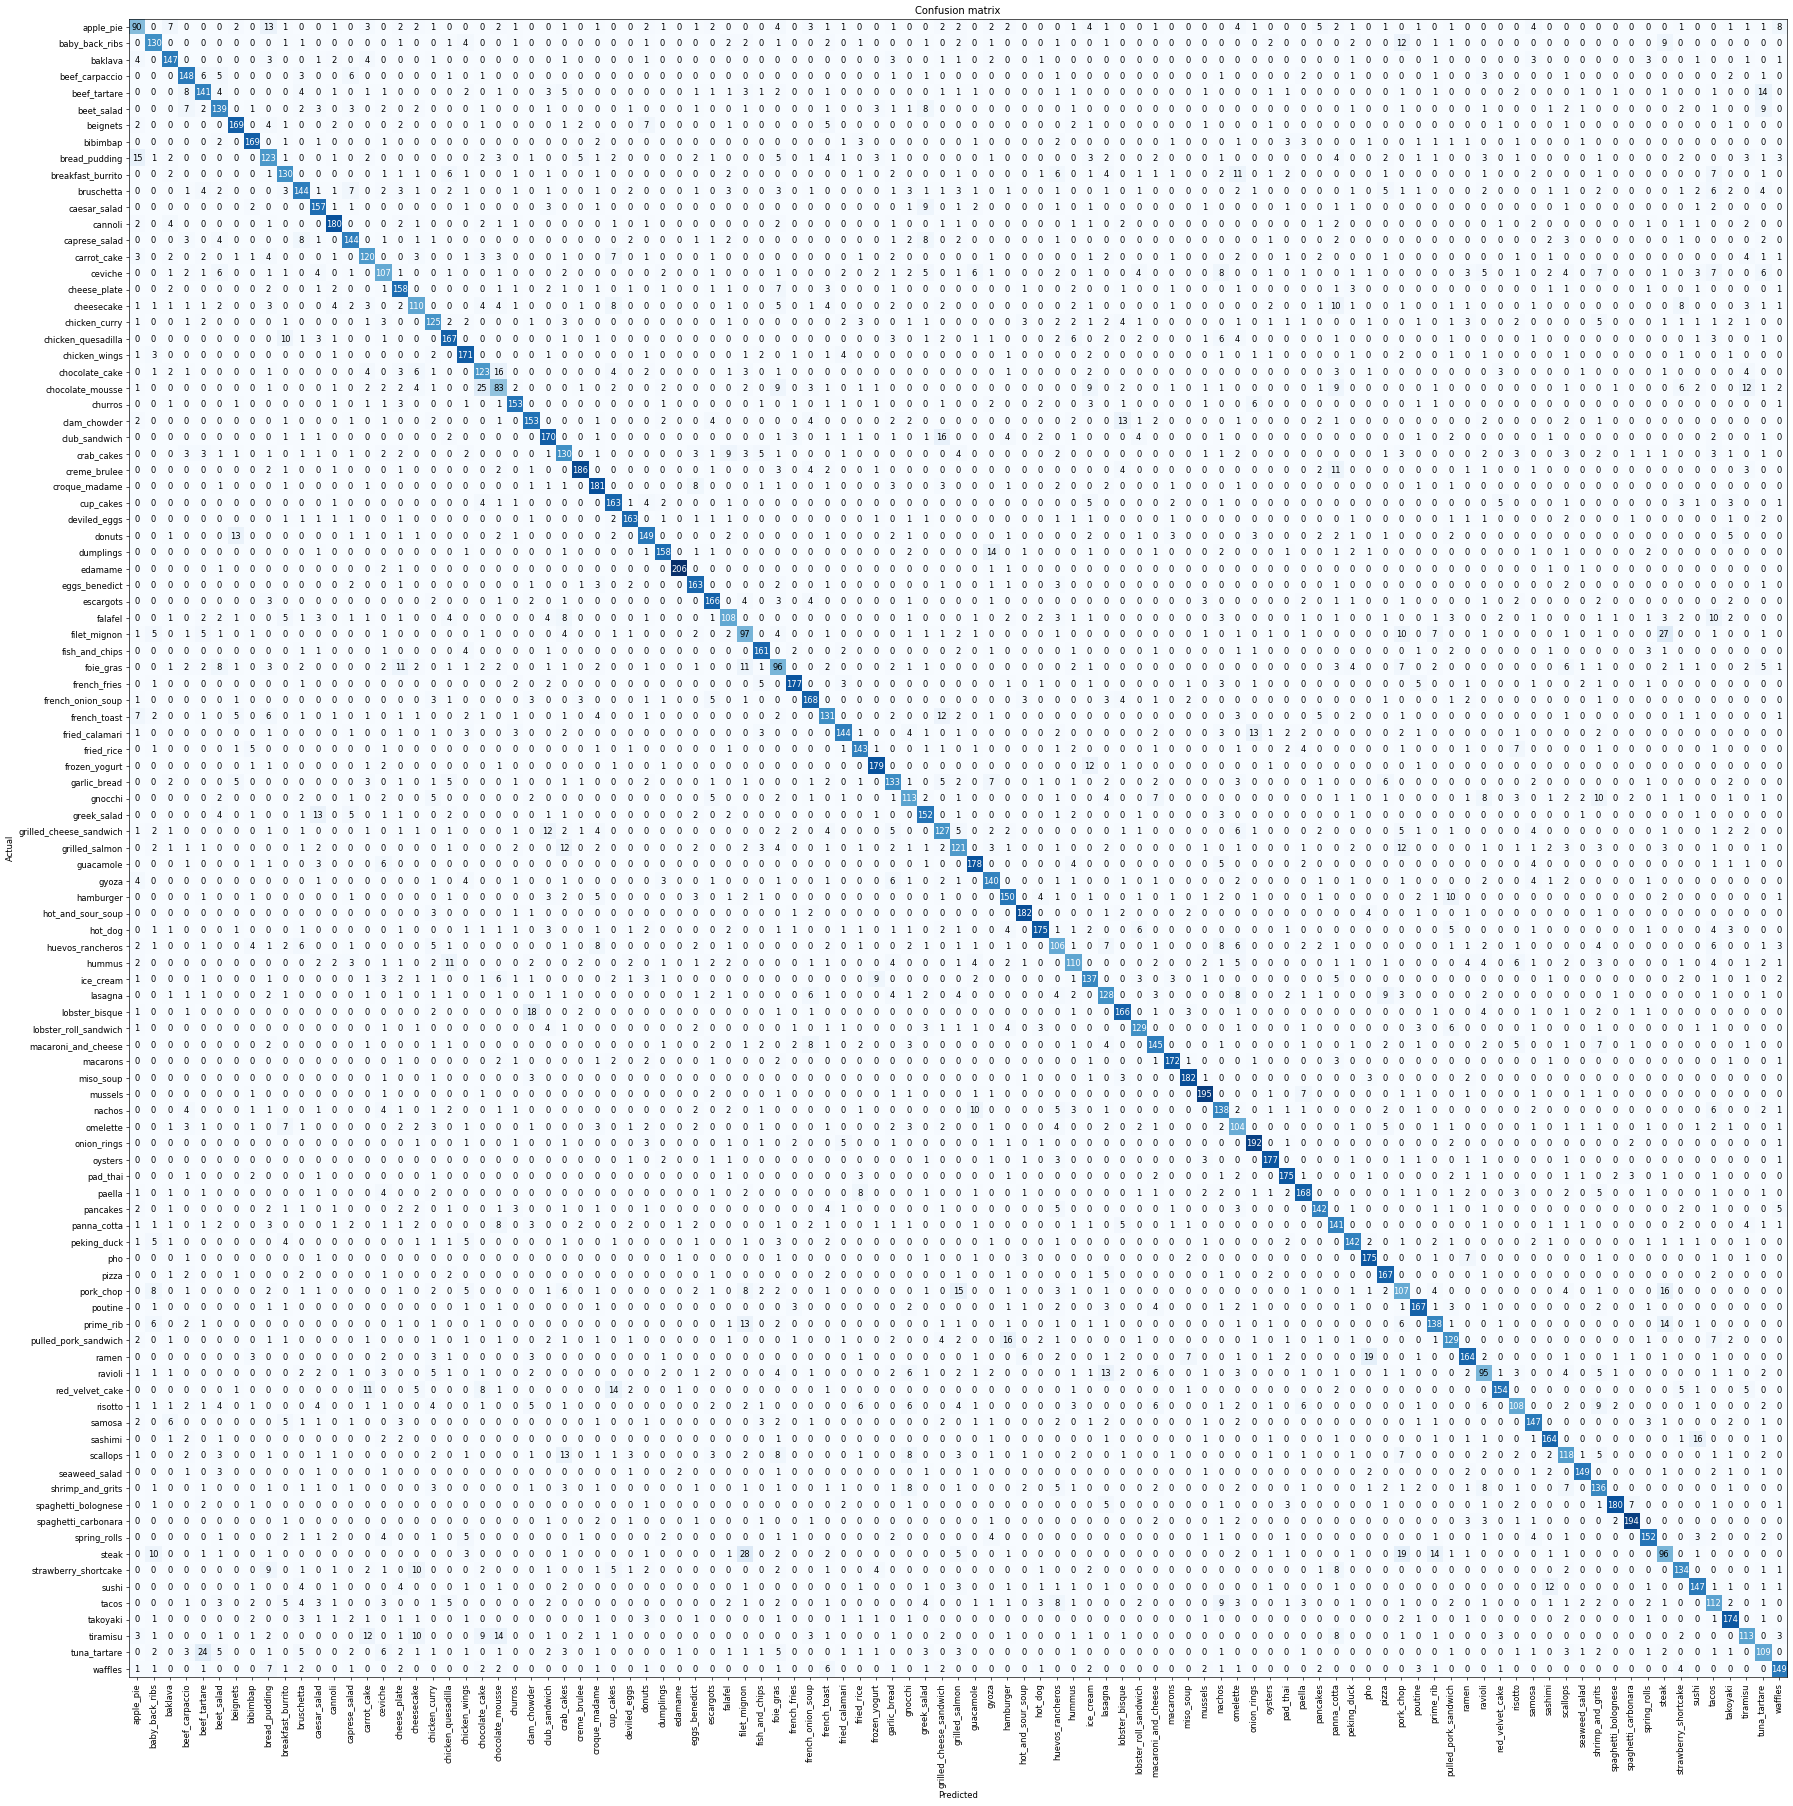

In [141]:
interp.plot_confusion_matrix(figsize=(30,30),dpi = 60)

In [145]:
interp.most_confused(min_val=10)

[('steak', 'filet_mignon', 28),
 ('filet_mignon', 'steak', 27),
 ('chocolate_mousse', 'chocolate_cake', 25),
 ('tuna_tartare', 'beef_tartare', 24),
 ('ramen', 'pho', 19),
 ('steak', 'pork_chop', 19),
 ('lobster_bisque', 'clam_chowder', 18),
 ('chocolate_cake', 'chocolate_mousse', 16),
 ('club_sandwich', 'grilled_cheese_sandwich', 16),
 ('pork_chop', 'steak', 16),
 ('pulled_pork_sandwich', 'hamburger', 16),
 ('sashimi', 'sushi', 16),
 ('bread_pudding', 'apple_pie', 15),
 ('pork_chop', 'grilled_salmon', 15),
 ('beef_tartare', 'tuna_tartare', 14),
 ('dumplings', 'gyoza', 14),
 ('prime_rib', 'steak', 14),
 ('red_velvet_cake', 'cup_cakes', 14),
 ('steak', 'prime_rib', 14),
 ('tiramisu', 'chocolate_mousse', 14),
 ('apple_pie', 'bread_pudding', 13),
 ('clam_chowder', 'lobster_bisque', 13),
 ('donuts', 'beignets', 13),
 ('fried_calamari', 'onion_rings', 13),
 ('greek_salad', 'caesar_salad', 13),
 ('prime_rib', 'filet_mignon', 13),
 ('ravioli', 'lasagna', 13),
 ('scallops', 'crab_cakes', 13),
 

In [147]:
learn.unfreeze()
learn.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (80800 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bruschetta,bruschetta,bruschetta,bruschetta,bruschetta
Path: /root/.fastai/data/food-101/images;

Valid: LabelList (20200 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fried_rice,chocolate_mousse,ice_cream,waffles,tiramisu
Path: /root/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=Fa

In [148]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


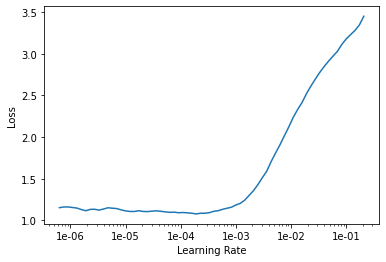

In [149]:
learn.recorder.plot()

In [150]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.072843,0.947866,0.252772,24:11
1,1.005803,0.915470,0.245545,23:58


In [0]:
learn.save('stage2')